# Better than the First:  An Analysis of Franchised Movie Series 
Prepared by: Manansala, Gonzales

<img src = "src/sequel-image.png" width = "600"/>


## Executive Summary

Movie sequels are build from the initial movie release of its franchise. This paper analyzes the performance of sequel movies by gauging the performance of a movie series, and determining if it will be patronized by audiences to maximize its profitability.

The data used for this report were scraped from Wikipedia and IMDb websites.
IMDb audience ratings, and movie gross earnings were used to measure the success of the movie release.  

A quadrant-plot was formulated to objectively associate the movie metrics in terms of profitability and audience rating. Using this, we were able to categorize the movie series performance based on the original movie release. These are (1) Better than the First, (2) As Good as the First, and (3) Behind the First. 

As business value for the movie production houses, the generated plot can be a guide to assess whether a movie series can be further stretched to have more releases in movie theaters or movie streaming.

## Introduction

<p>The movie film industry has been in this world since the invention of film cameras. From 1900’s silent films to the latest IMAX 3D technology, people have watched hundreds or even thousands of movie films. The industry is the new storyteller, re-enacting fictional or non-fictional ideas of an author.<br>
    
Movie films are like written stories. Some are like short stories, some are long like novels, and some have a series of books. In our project, we considered looking at the performance of movie sequels compared to its original release and analyze them based on their ratings and gross earnings. </p>

## Problem Statement and Rationale

The movie industry suffered a significant blow by the COVID19 pandemic. With this, movie producers and directors need to optimize their movie production on where ratings and profitability matter most.
    
In recent years, Hollywood has been following a trend – the creation of movie series (also known as movie franchise), which is based on the earlier release film. The movie series can be in the form of a prequel, sequel, reboot, or spin-off. The movie series builds on the success of the earlier released movie to market the new film. However, not all movies are made the same. Some outperform the first, while others were just considered-- bad.

What can be a better gauge to measure the performance of a movie series? How would the movie production houses determine if a movie will be patronized by the audiences?  Can the movie production houses predict if they can stretch the profitability of a movie franchise?



## Data Processing and Analysis Workflow

<img src = "src/workflow.png" width = "600"/>

* List of Movies of Different Franchised are scraped from Wikipedia
* Lists of Movie Information (Gross Earning, Budget, Release Date etc) were scraped form IMDb
    * Movie posters were also scraped from IMDb
*Using SQLlite data, 

## Data Description and Data Processing

### Description

<p>The dataset used in this notebook contains movie information scraped from Wikipedia and IMDb websites (early 19xx to 2020). Extracted from Wikipedia are movie series lists per franchise, while the movie information, which includes production details, budgets, box office earnings,  poster links, and ratings, are from IMDb. 
    
SQLite database is the medium used to store the scraped information and saved to the provided MSDS2021 public directory. Three databases contain the movie series list, the movie information, and the poster links, respectively. Dataframe generated from these databases to generate reports and visualizations. </p>

### Code for Processing

These are the methods implemented to create a dataframe ready for analysis.
* Scrape the lists of movie sequels from Wikipedia webpages 
* Scrape the movie details from IMDb webpages
* Store the data on SQLite at the shared directories
* Join the datasets
* Clean the datasets

The Wikipedia Webpages `https://en.wikipedia.org/wiki/Film_series` \
The IMDb webpages are from `https://www.imdb.com/search/title/title_type=movie&sort=boxoffice_gross_us,desc&explore=title_type,genres`

Our group created separate modules to help us in processing the data.<br/>
* **clean_data.py** - data processing and cleaning of all data from SQL database
* **images.py** - contains common functions for this notebook

Additionally, separate `.txt` files are created to store the shared directories in this notebook. The following are the necessary files to acquire the data needed for this notebook <br/>
* **Wikipedia_Movies.txt** - stores the shared directory filepath of the wikipedia scraped data
* **IMDb_movies.txt** - stores the shared directory filepath of the IMDb list scraped data
* **IMDb_movies_per_page.txt** - stores the shared directory filepath of the IMDb per individual webpage scraped data


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import re
import time
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from src.images import Show_figures, Show_template
from src.clean_data import Process

### Load Scraped Data from Wikipedia

In [2]:
with open('src/Wikipedia_Movies.txt', "r") as filepath1:
    conn = sqlite3.connect(filepath1.read())
    conn.execute('SELECT * FROM Wikipedia_Movies')
    df_wiki = pd.read_sql("""SELECT "Movie Series", "Movie Count",
                                    "Movie Name", "Year", "Wikipedia Link" 
                             FROM Wikipedia_Movies""", conn)
    df_wiki = df_wiki[df_wiki.Year<'2020'] 
df_wiki.head(5)

Movie Series Movie Count                                  Movie Name  Year  \
0  00 Schneider  two movies        00 Schneider – Jagd auf Nihil Baxter  1994   
1  00 Schneider  two movies  00 Schneider – Im Wendekreis der Eidechse   2013   
2  2 Days in...  two movies                             2 Days in Paris  2007   
3  2 Days in...  two movies                          2 Days in New York  2012   
4           8mm  two movies                                         8mm  1999   

                                      Wikipedia Link  
0  https://en.wikipedia.org/wiki/00_Schneider_%E2...  
1  https://en.wikipedia.org/w/index.php?title=00_...  
2      https://en.wikipedia.org/wiki/2_Days_in_Paris  
3   https://en.wikipedia.org/wiki/2_Days_in_New_York  
4           https://en.wikipedia.org/wiki/8mm_(film)

### Load Scraped Data from IMDb (List of Movies)

In [3]:
with open('src/IMDb_movies.txt', "r") as filepath2:
    conn2 = sqlite3.connect(filepath2.read())
    conn2.execute('SELECT * FROM IMDb_movies')
    df_imdb = pd.read_sql("""SELECT "Movie", "Year", "Genre", "Runtime", 
                                    "Certificate", "Ratings Star", 
                                    "Metascore", "Votes", "Movie Link" 
                             FROM IMDb_movies""", conn2)
    df_imdb = df_imdb[df_imdb.Year<'2020'] 
df_imdb.head(5)

Movie  Year                     Genre  \
0  Star Wars: Episode VII - The Force Awakens  2015   Action Adventure Sci-Fi   
1                           Avengers: Endgame  2019    Action Adventure Drama   
2                                      Avatar  2009  Action Adventure Fantasy   
3                               Black Panther  2018   Action Adventure Sci-Fi   
4                      Avengers: Infinity War  2018   Action Adventure Sci-Fi   

   Runtime Certificate Ratings Star   Metascore      Votes  \
0  138 min          PG          7.9  80            840,172   
1  181 min        PG13          8.4  78            730,971   
2  162 min          PG          7.8  83          1,094,980   
3  134 min          PG          7.3  88            585,371   
4  149 min        PG13          8.4  68            781,829   

                              Movie Link  
0  https://www.imdb.com/title/tt2488496/  
1  https://www.imdb.com/title/tt4154796/  
2  https://www.imdb.com/title/tt0499549/  
3  https://www.imdb.com/title/tt1825683/  
4  https://www.imdb.com/title/tt4154756/

### Load Scraped Data from IMDb (Individual Movie Webpages)

In [4]:
with open('src/IMDb_movies_perpage.txt', "r") as filepath3:
    conn3 = sqlite3.connect(filepath3.read())
    conn3.execute('SELECT * FROM IMDb_movies_perpage')
    df_imdb_perpage = pd.read_sql("""SELECT "Movie Link", "Country",
                                            "Language", "Budget", 
                                            "Worldwide Gross", 
                                            "Production Co", "Poster"
                                     FROM IMDb_movies_perpage""", conn3)
df_imdb_perpage.head(5)

Movie Link Country Language        Budget  \
0  https://www.imdb.com/title/tt2488496/     USA  English  $245,000,000   
1  https://www.imdb.com/title/tt4154796/     USA  English  $356,000,000   
2  https://www.imdb.com/title/tt0499549/     USA  English  $237,000,000   
3  https://www.imdb.com/title/tt1825683/     USA  English  $200,000,000   
4  https://www.imdb.com/title/tt4154756/     USA  English  $321,000,000   

  Worldwide Gross                                      Production Co  \
0  $2,068,223,624  Lucasfilm, Bad Robot, Truenorth Productions, S...   
1  $2,797,800,564     Marvel Studios, Walt Disney Pictures, See more   
2  $2,790,439,000  Twentieth Century Fox, Dune Entertainment, Lig...   
3  $1,346,913,161     Marvel Studios, Walt Disney Pictures, See more   
4  $2,048,359,754  Marvel Studios, Jason Roberts Productions, Sou...   

                                              Poster  
0  https://m.media-amazon.com/images/M/MV5BOTAzOD...  
1  https://m.media-amazon.com/images/M/MV5BMTc5MD...  
2  https://m.media-amazon.com/images/M/MV5BMTYwOT...  
3  https://m.media-amazon.com/images/M/MV5BMTg1MT...  
4  https://m.media-amazon.com/images/M/MV5BMjMxNj...

### Joining of the three SQL Databases

In [5]:
df_imdb_merged = pd.merge(df_imdb, df_imdb_perpage, how="left", 
                          on="Movie Link")
df_merged = pd.merge(df_imdb_merged, df_wiki, how="left", 
                          left_on=['Movie', 'Year'], 
                          right_on=['Movie Name', 'Year'])
df_merged = df_merged.drop(columns=['Movie Link', 'Wikipedia Link', 
                                    'Movie Name'])

### Data Cleaning and Formatting using .py file

In [6]:
data = Process(df_merged)
df_merged = data.format_tables()

### Dataframe to be used in the EDA

In [7]:
df_merged.head(3)

Movie  Year  \
0  Star Wars: Episode VII - The Force Awakens  2015   
1                           Avengers: Endgame  2019   
2                                      Avatar  2009   

                          Genre  Runtime Certificate  Ratings Star  Metascore  \
0   [Action, Adventure, Sci-Fi]    138.0          PG           7.9       80.0   
1    [Action, Adventure, Drama]    181.0        PG13           8.4       78.0   
2  [Action, Adventure, Fantasy]    162.0          PG           7.8       83.0   

       Votes Country Language       Budget  Worldwide Gross  \
0   840172.0     USA  English  245000000.0     2.068224e+09   
1   730971.0     USA  English  356000000.0     2.797801e+09   
2  1094980.0     USA  English  237000000.0     2.790439e+09   

                                       Production Co  \
0  Lucasfilm, Bad Robot, Truenorth Productions, S...   
1     Marvel Studios, Walt Disney Pictures, See more   
2  Twentieth Century Fox, Dune Entertainment, Lig...   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BOTAzOD...   
1  https://m.media-amazon.com/images/M/MV5BMTc5MD...   
2  https://m.media-amazon.com/images/M/MV5BMTYwOT...   

                Movie Series              Movie Count Currency Budget  \
0                  Star Wars  eleven to twenty movies               $   
1  Marvel Cinematic Universe       twenty plus movies               $   
2                     Avatar             three movies               $   

  Currency Gross  New Count  
0              $       12.0  
1              $       21.0  
2              $        1.0

## Exploratory Data Analysis

This section presents the explorations the group conducted to answer the specific objectives/questions presented in the **Problem Statement and Rationale** section. 

Ultimately, the goal was to generate insights that answer our primary objective.

### 1. Annual Top Grossing Films

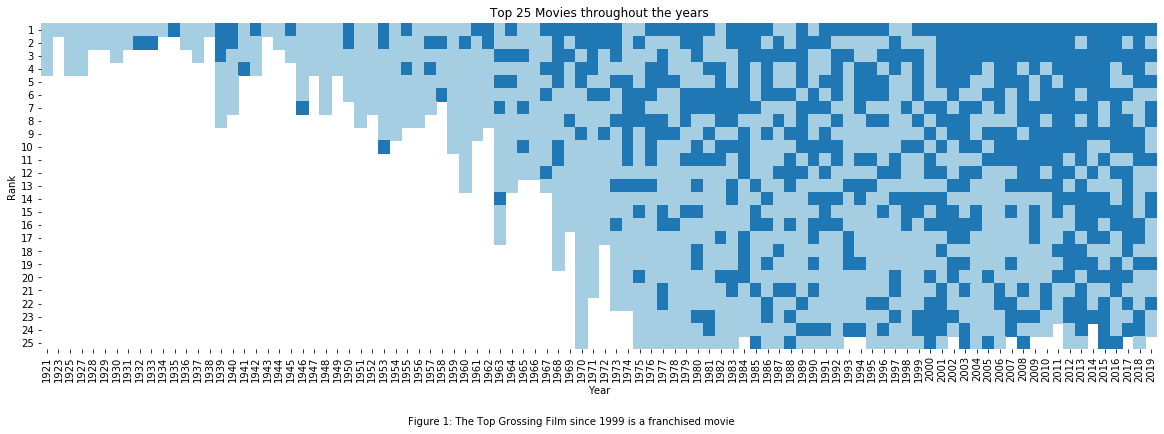

In [8]:
data = Process(df_merged)
df_merged_per_year = data.groupby_year()
df_merged_per_year['Rank'] = (df_merged_per_year['Rank']
                              .apply(lambda x: int(x)))
plt.figure(figsize=(20,6))
df_heatmap = df_merged_per_year.pivot_table(values='Sequel',
                                            index="Rank", columns='Year')
cmap = sns.color_palette("Paired", 2 ) 
sns.heatmap(df_heatmap, cmap=cmap, cbar=False);
caption = ('Figure 1: The Top Grossing Film since 1999 is a franchised movie')
plt.figtext(.38, -0.05, s=caption)
plt.title("Top 25 Movies throughout the years"); 
plt.yticks(rotation=0);
#DarkBlue is Sequel, Light Blue is standalone

The **Number 1 top grossing film annually is consistently part of a movie series** (dark blue on the figure) and this trend has been going on since 1999. In fact, majority of the top 10 movies since 2000 are part of a movie series as shown with the cluster of dark blue pixels in the heatmap. Some of the movies that topped the charts in the recent years are as follows:
> 1. *Avengers: Endgame (2019)*
> 2. *Avengers: Infinity War (2018)*
> 3. *Star Wars: The Last Jedi (2017)*

The last stand-alone movie that topped the charts was *Armaggedon (1998)* and *Titanic (1997)*. 




### 2. Movie Genre of Movies with Sequels

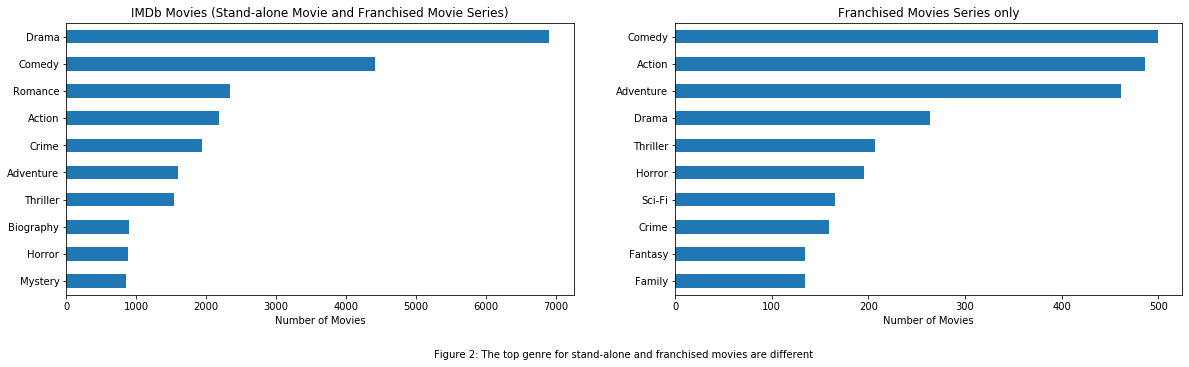

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
(pd.Series(sum([item for item in df_merged.Genre], [])).value_counts()
                     .sort_values(ascending=True)[-10:].plot.barh(ax=ax[0]));
df_sequels = df_merged[df_merged['New Count']>1]
(pd.Series(sum([item for item in df_sequels.Genre], [])).value_counts()
                     .sort_values(ascending=True)[-10:].plot.barh(ax=ax[1]));
ax[0].set_title("IMDb Movies (Stand-alone Movie and Franchised Movie Series)")
ax[1].set_title("Franchised Movies Series only");
ax[0].set_xlabel("Number of Movies")
ax[1].set_xlabel("Number of Movies");

caption = ('Figure 2: The top genre for stand-alone and franchised movies'
           ' are different');
plt.figtext(.38, -0.05, s=caption);

The most common Genre of movie series are **Comedy**, **Action**, and **Adventure**.  This is in comparison with stand-alone movies in which the most common movie genre is *Drama* such as the likes of *Titanic* and *A Walk to Remember* with no movie sequel. This shows that movie production houses have preferred genre of movie series to produce. Some of the movie series falls under the three top movie genres are as follows:
> 1. Comedy: *Finding Dory, Frozen, Toy Story, Shrek, Guardians of the Galaxy, Thor*
> 2. Action: *The Expendables, Die Hard, Mission: Impossible, The Escape Plan*
> 3. Adventure: *Harry Potter, Lord of the Rings, The Hobbit, Star Wars, Star Trek*

### 3. Most Common Number of Movies in Movie Series

The median of the movies number is: 3.0


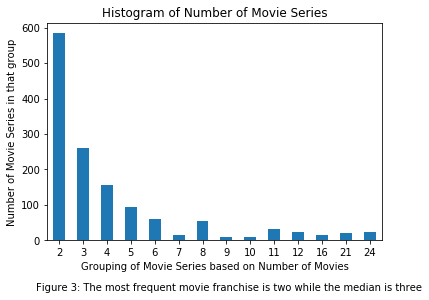

In [10]:
df_merged['New Count'] = (df_merged['New Count']
                        .apply(lambda x: int(x) if x>=1 else 0))
df_sequels = df_merged[df_merged['New Count']>1]
counts = df_sequels.groupby("New Count")['Movie'].count()
counts.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Grouping of Movie Series based on Number of Movies")
plt.ylabel("Number of Movie Series in that group")
plt.title("Histogram of Number of Movie Series")
caption = ('Figure 3: The most frequent movie franchise is two'
           ' while the median is three')
plt.figtext(.1, -0.05, s=caption)
result = []
for i in range(len(counts)):
    result.append([counts.index[i]] * counts.values[i])
print("The median of the movies number is:", 
      pd.Series(sum(result, [])).median())

The distribution of the movie series size (number of movies in the series) is skewed to the left wherein two-movie series is the most common. **The median of the movie sequels is three**, and this type of movie series is popularly known as the **Trilogy**. Some of the movies in this spectrum are *Back to the Future*, *The Matrix*, and *Spider-Man*.

Comparing the performance of movie series based on the sequence of release, given their different sizes, the groups of movie series were divided into three sections: *First*, *Middle*, and *Finale*.  The median number  **three** is used to determine the sections of a movie series.

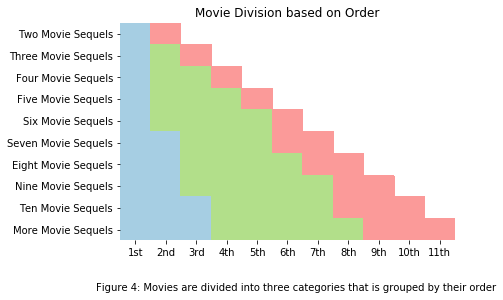

In [11]:
show = Show_template()
show.prof_vs_scores();
plt.title("Movie Division based on Order");
caption = ('Figure 4: Movies are divided into three categories '
           'that is grouped by their order');
plt.figtext(.07, -0.05, s=caption);

In this figure, the **First** are in *Blue*, the **Middle** are in *Green* and the **Finale** are in *Red*. These classifications will be used for the comparison in audience response and profitability of movie series. This procedure is done to compare movie franchises of different number of movies.

### 4. Audience Response on Movie Sequels

In [12]:
df_sequels = df_merged[df_merged['New Count']>1]
data = Process(df_sequels)
movie_first, movie_mids, movie_finale = data.group_by_series()

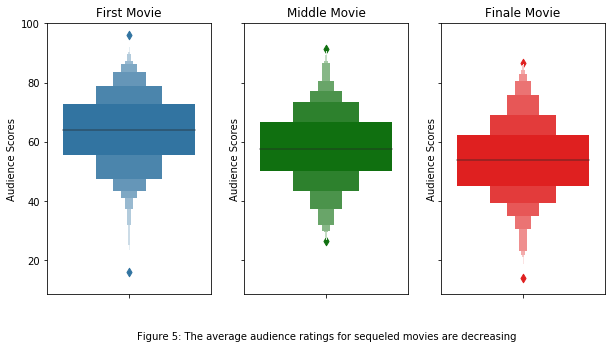

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharey=True)
sns.boxenplot(movie_first['Audience Scores'], orient='v', ax=ax[0])
sns.boxenplot(movie_mids['Audience Scores'], orient='v', ax=ax[1], 
              color='green')
sns.boxenplot(movie_finale['Audience Scores'], orient='v', ax=ax[2], 
              color='red')
ax[0].set_title("First Movie")
ax[1].set_title("Middle Movie")
ax[2].set_title("Finale Movie");
caption = ('Figure 5: The average audience ratings for sequeled'
           ' movies are decreasing');
plt.figtext(.25, -0.001, s=caption);

`Audience ratings` is the combined average score of the star ratings of the IMDB viewers and the meta scores of the IMDb critics.
Based on the collected data, the downward trend in audience scores is observable as the movies progressed into the series. From an average of 65 on the first movies, the middle and finale movies decreased to 58 and 55, respectively. 

In short, **the positive audience response to an average movie series decreases as more movies from the same series are released**

### 5. Profitability of Movie Sequels

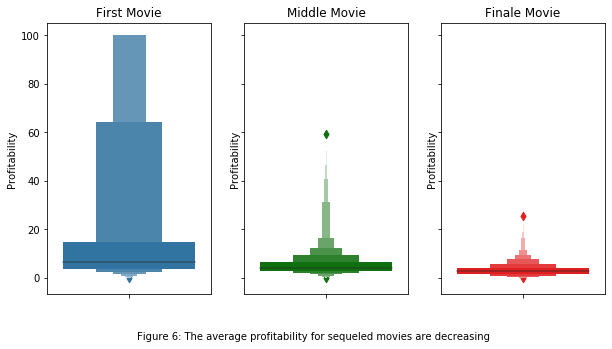

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharey=True)
sns.boxenplot(movie_first['Profitability'], orient='v', ax=ax[0])
sns.boxenplot(movie_mids['Profitability'], orient='v', ax=ax[1],color='green')
sns.boxenplot(movie_finale['Profitability'], orient='v', ax=ax[2],color='red')
ax[0].set_title("First Movie")
ax[1].set_title("Middle Movie")
ax[2].set_title("Finale Movie");
caption = ('Figure 6: The average profitability for sequeled'
           ' movies are decreasing')
plt.figtext(.25, -0.001, s=caption);

The `profitability` ratio is defined as the movie's worldwide gross divided by the budget of the movie.

As shown, the first movies tend to have a higher profitability ratio than the succeeding films. Many of the first movies can be considered as *unicorn* films wherein the colossal audience response and box office were unexpected - these are typically low budget films. Some movies in this spectrum are:
> 1.	Paranormal Activity: 12,000
> 2.	The Blair Witch Project: 4,000

However, the **profitability success of the first movies does not transcend to their succeeding movies** as the profitability ratio of the middle and finale movies are smaller than the previous ones. Moreover, the sequels of the unicorn films were not able to receive the same box office as the first movie.
Note: The profitability ratio in the figure shown above is maxed out at 100 to emphasize the changes in the max point of the three film categories.

### 6. Stand-alone movies that will have Sequels

`Quadrant scale` is devised to compare the profitability and audience response of the movies.<br> 
The Four (4) quadrant zones or area, are the following:
> 1. **Higher Profits, High Ratings** - This is the target area of movie production houses - the **unicorn** movies. Movies that lie here have a high tendency of having a sequel even though it is meant to be a stand-alone film. Movies that belong here are the *Paranormal Activity*, *Rocky*, and the *Texas Chainsaw Massacre*.
> 2. **Profitable, High Ratings** - This is the usual classification of successful movie franchises. Many movies belong here are *Harry Potter Franchise* and *Lord of the Rings Franchise*.
> 3. **Profitable, Low Ratings** - This is where movie sequels get canceled due to low audience response and low profits. Movies include *The Divergent Series*, and *Independence Day Series*. 
> 4. **Higher Profits, Low Ratings** - This is unusual low-rating, but box office hits. Movies that belong here are the *The Twilight Saga* and *Saw Franchise*.

Also, a 5th classification is added, which is the **Breakeven** Area. This area is bounded by the vertical red line in which the movie must surpass to be profitable. Movies closer to this line tend to have no successors.

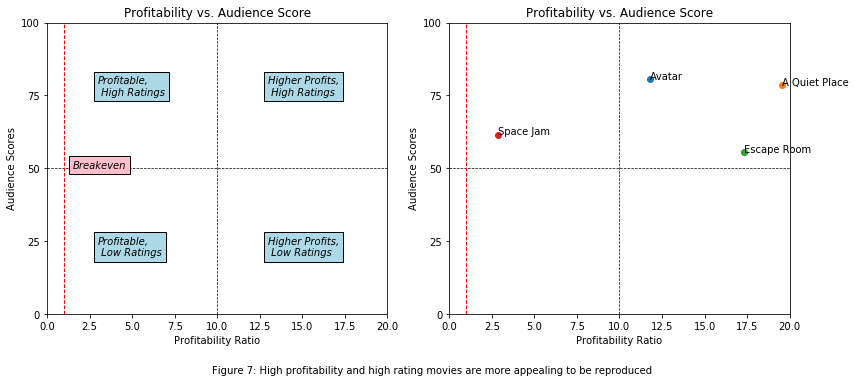

In [15]:
show = Show_figures(df_merged)
show.scatter_plot();
caption = ('Figure 7: High profitability and high rating movies are more'
           ' appealing to be reproduced')
plt.figtext(.25, -0.05, s=caption);

By using these quadrants on the upcoming new sequel movies of the season, we can see why the movie production houses decided to pursue a sequel on this original movies - and that is PROFITS! Some of which are:

> 1. ***Avatar*** - Of course, the top-grossing film of all time is going to get a sequel. Avatar 2 and 3 are scheduled for release in 2021 and 2023. There are even talks that an Avatar 4 and 5 might happen soon.
> 2. ***A Quiet Place*** - Shhh… it is set to be released on March 20, 2020, but was delayed due to the COVID-19 pandemic.
> 3. ***Escape Room*** -  A *unicorn* movie, indeed. However, does it really need a sequel? Release of Escape Room 2 is on January 2021.
> 4. ***Space Jam*** - This 1996 classic, with scheduled be to released on US theater on July 16, 2021, but with LeBron James instead of Michael Jordan.


### 7. In-depth Look at Popular Movie Series

### 7.1. Movies that are "Better than the First"

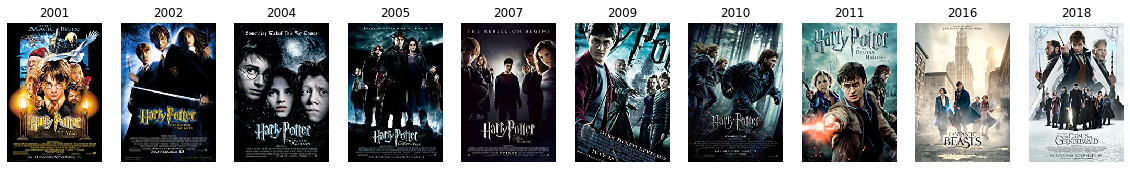

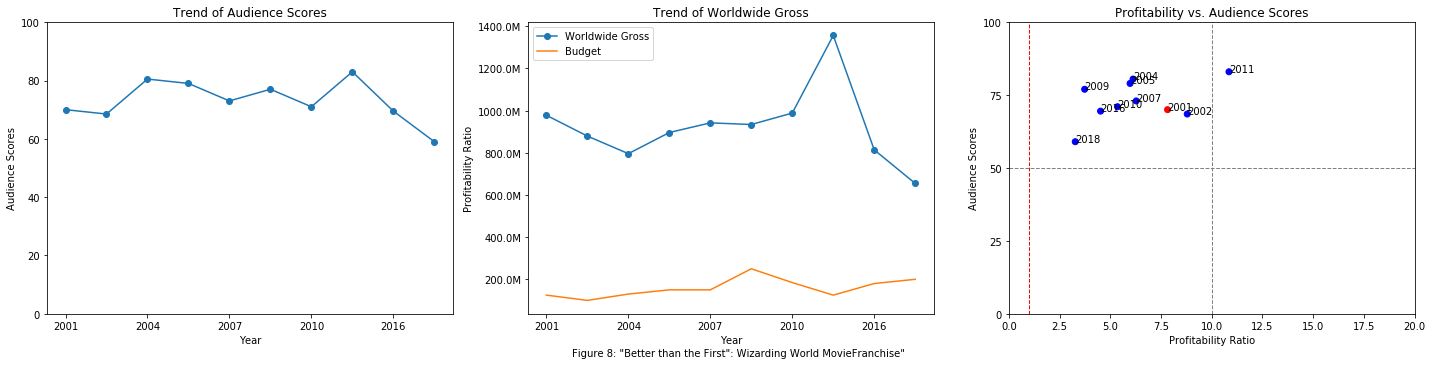

In [16]:
data = df_merged[df_merged['Movie Series']=="Wizarding World"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 8: "Better than the First": Wizarding World Movie'
           'Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***Expelliarmus!***" The Harry Potter movie franchise is one of the greatest movie series of our generation. Each succeeding movie builds up and the timeline and making the movie finale one of the top-grossing films of all time. They tried to make a spinoff using the *Fantastic Beasts* series. However, audience response is not as high as the original series.

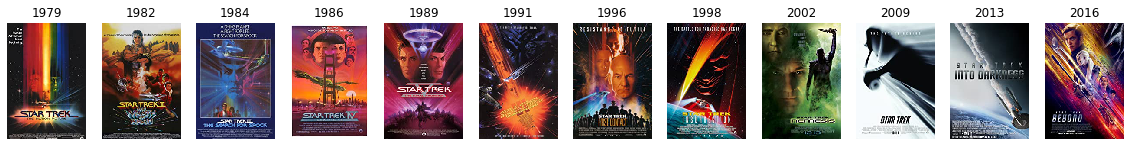

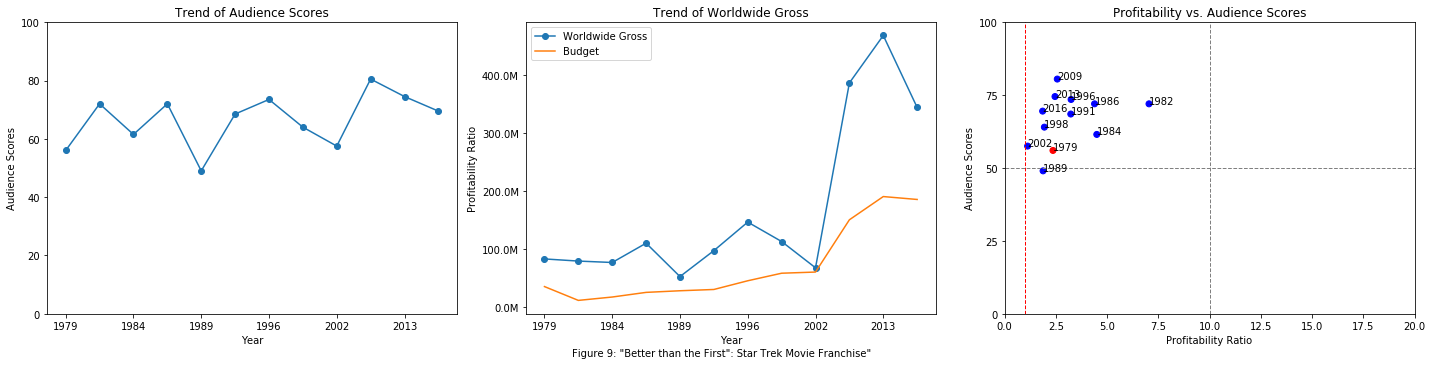

In [17]:
data = df_merged[df_merged['Movie Series']=="Star Trek"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 9: "Better than the First": Star Trek Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***Long, live and prosper***". The Star Trek movie franchise is one of the longest-running movie series and with good audience response. Audience ratings of the succeeding movies are even better than their first movie released. Indeed, it is Better than the First!

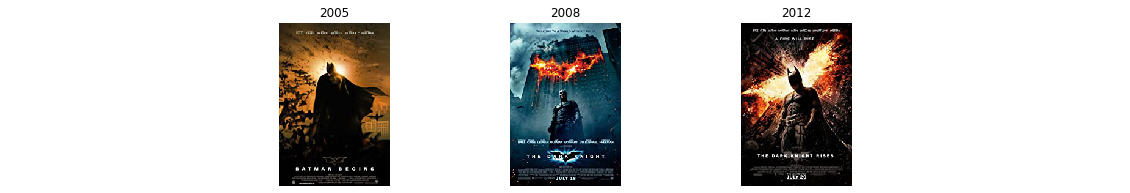

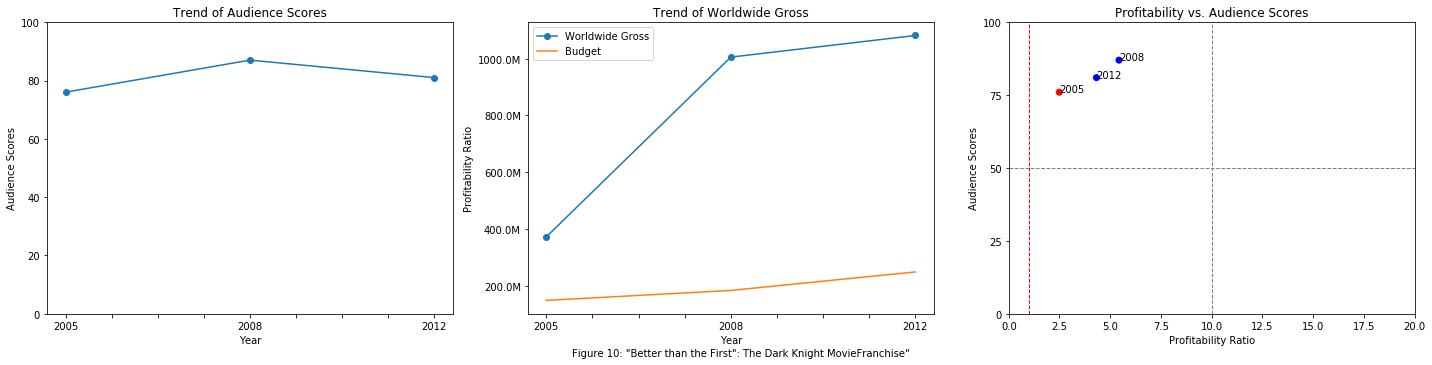

In [18]:
data = df_merged[df_merged['Movie Series']=="The Dark Knight Trilogy"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 10: "Better than the First": The Dark Knight Movie'
           'Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***You either die a hero or you live long enough to see yourself become the villain***". The *Dark Knight* is considered one of the best films of its decade and one of the best superhero films ever made. The audience response was big!

### 7.2. Movies that are "as Good as the First"

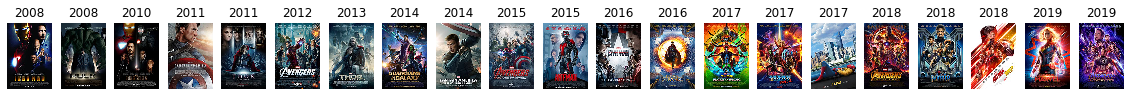

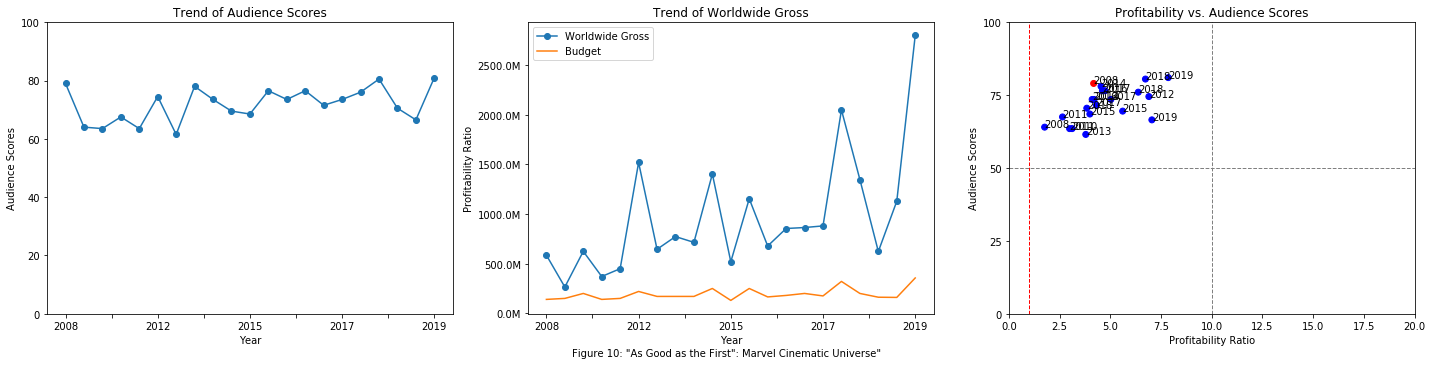

In [19]:
data = df_merged[df_merged['Movie Series']=="Marvel Cinematic Universe"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 10: "As Good as the First": Marvel Cinematic Universe"')
plt.figtext(.4, -0.001, s=caption);

"***I love you, 3000***". The Marvel Cinematic Universe is one of the top-grossing movie franchise today. It can be seen that they bank on the *Avengers* movie series to be the top-grossing films by doing lots of cross-overs on multiple superhero storylines. Also, instead of exhausting the audience's attention span to one character, they alternate the release. Indeed, smart marketing!.

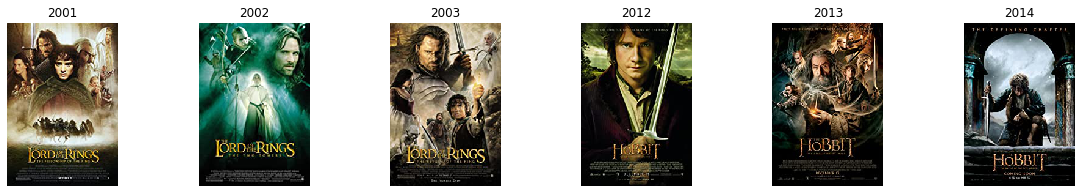

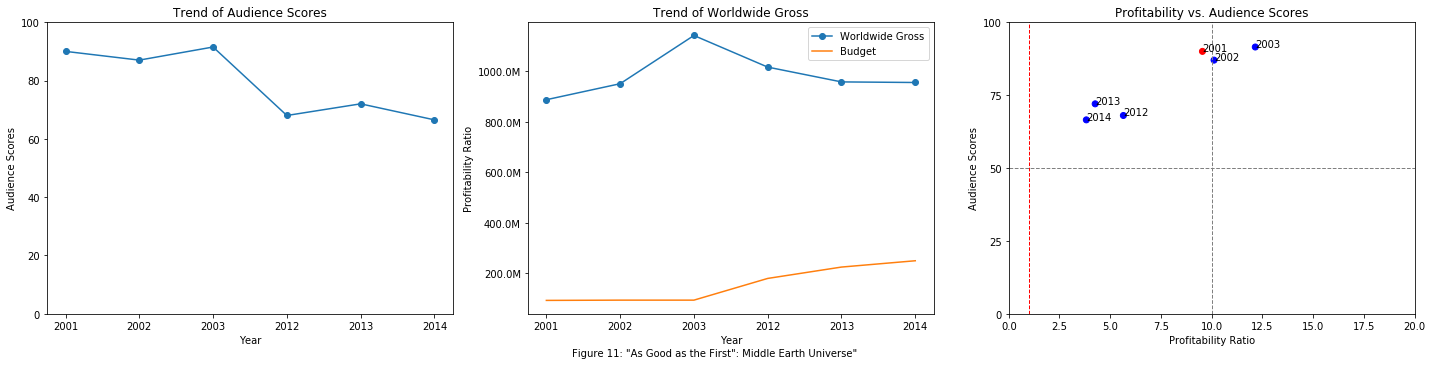

In [20]:
data = df_merged[df_merged['Movie Series']=="Middle Earth"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 11: "As Good as the First": Middle Earth Universe"')
plt.figtext(.4, -0.001, s=caption);

"***YOU SHALL NOT PASS!!!***" The J.R.R. Tolkien-novels turned into movies are an instant success! The audience response and profitability of each film in the two trilogies are almost similar to one another - thus, being "As good as the First". However, it is clear that the original *LOTR* trilogy is better than the *The Hobbit* Trilogy - maybe because the first trilogy had a lot more content since it is based from three books while the latter had only one book and is split into three movies. 

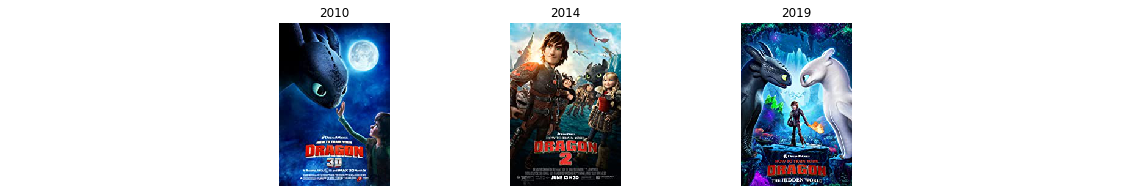

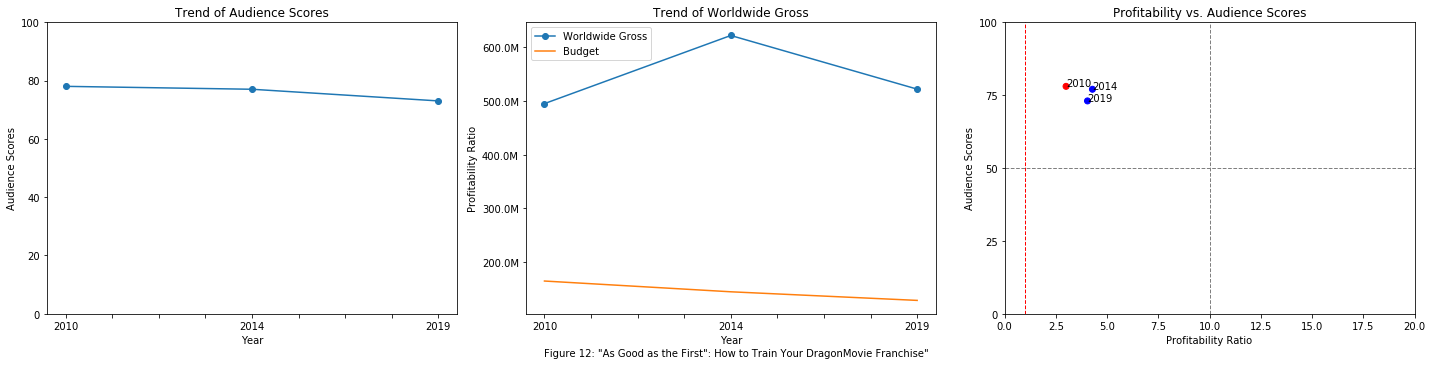

In [21]:
data = df_merged[df_merged['Movie Series']=="How to Train Your Dragon"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 12: "As Good as the First": How to Train Your Dragon'
           'Movie Franchise"')
plt.figtext(.38, -0.001, s=caption);

"***Welcome to Dragon Training!***". Dragons, dragons dragons everywhere. Every movie is a new story waiting to unfold. How to Train Your Dragon is one of the greatest successes of Dreamworks in Computer Animation.

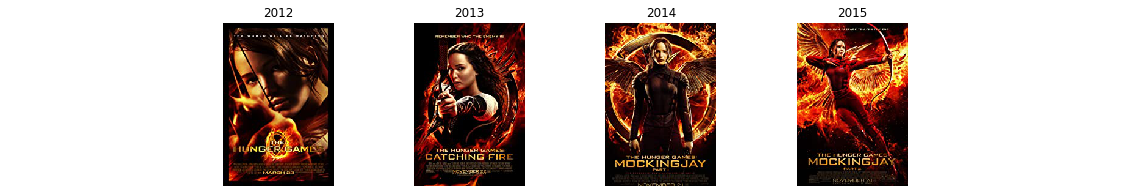

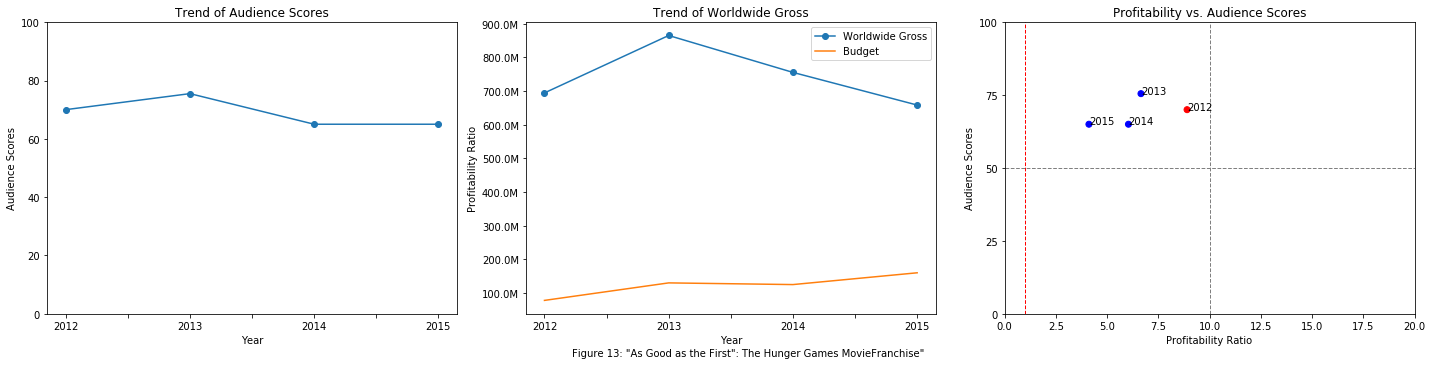

In [22]:
data = df_merged[df_merged['Movie Series']=="The Hunger Games"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 13: "As Good as the First": The Hunger Games Movie'
           'Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***I VOLUNTEER! I volunteer as tribute!***" The Hunger Games movie franchise is also of the recent successes with excellent audience response. They even managed to bank on this by splitting the movie's last installment into two parts.

### 7.3. Movies that are "Behind the First"

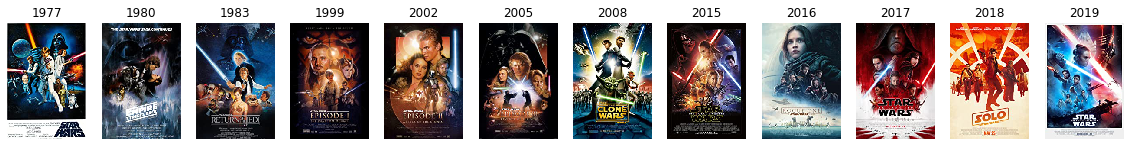

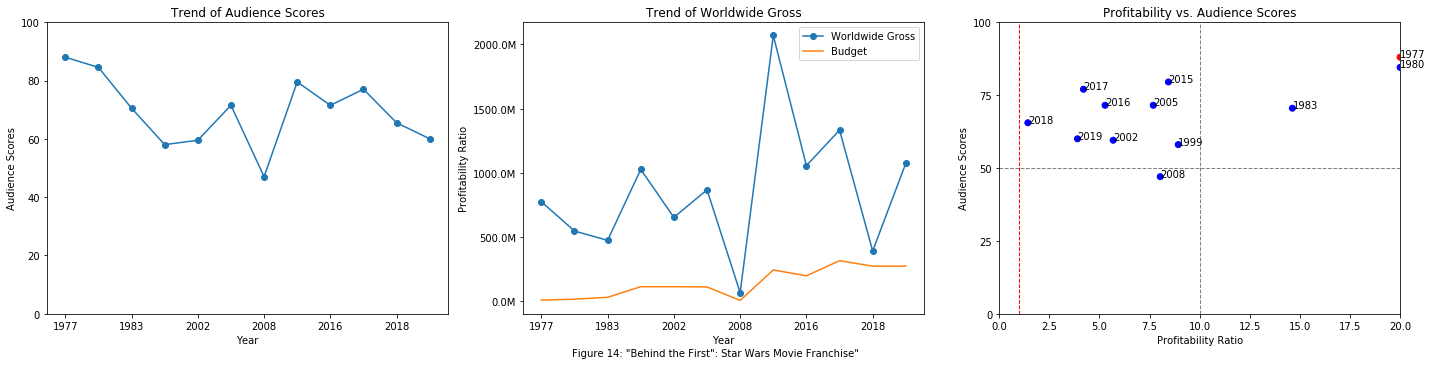

In [23]:
data = df_merged[df_merged['Movie Series']=="Star Wars"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 14: "Behind the First": Star Wars Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***YOU UNDERESTIMATE MY POWER!!!***". Although the Star Wars movie franchise are very popular, the audience response varies greatly on this movie franchise. With the high standards that Episode IV managed, the succeeding films just couldn't keep up. *Solo: A Star Wars Film* which is a spin-off is even an almost chart flopper. 

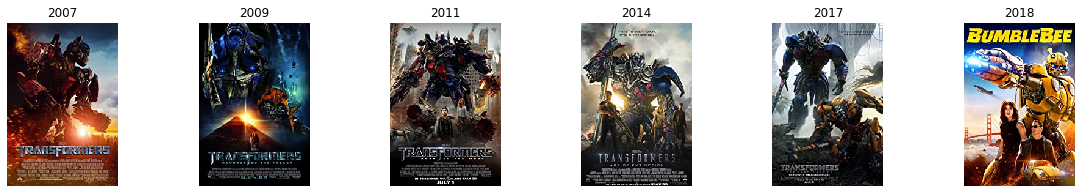

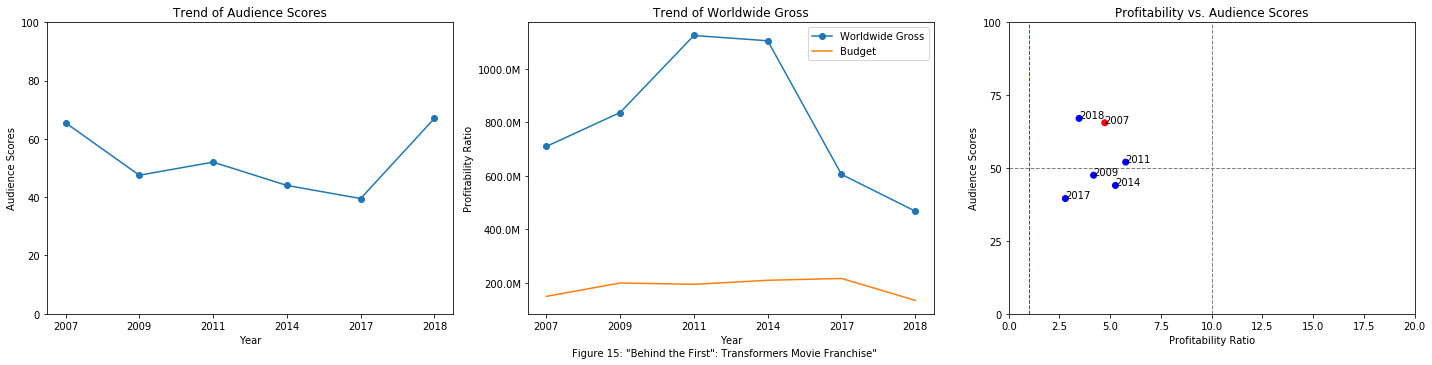

In [24]:
data = df_merged[(df_merged['Movie Series']=="Transformers") & 
                 (df_merged['Movie Count']=="six movies")]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 15: "Behind the First": Transformers Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***Auto-bots! Transform!***" Majority of the Transformers movies fall at the low-rating quadrant. This is why the Transformers shake things up by creating a spin-off movie that focuses on everybody's favorite transformer - *Bumblebee* - and this became an instant hit with higher ratings than the first movie.

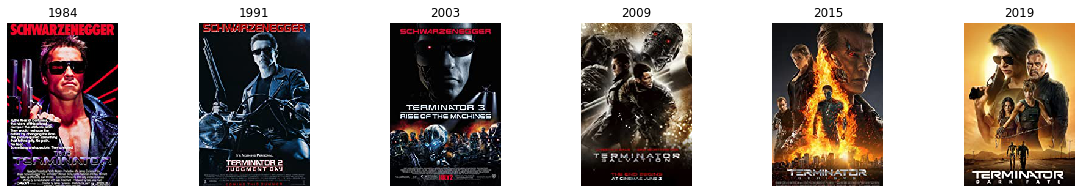

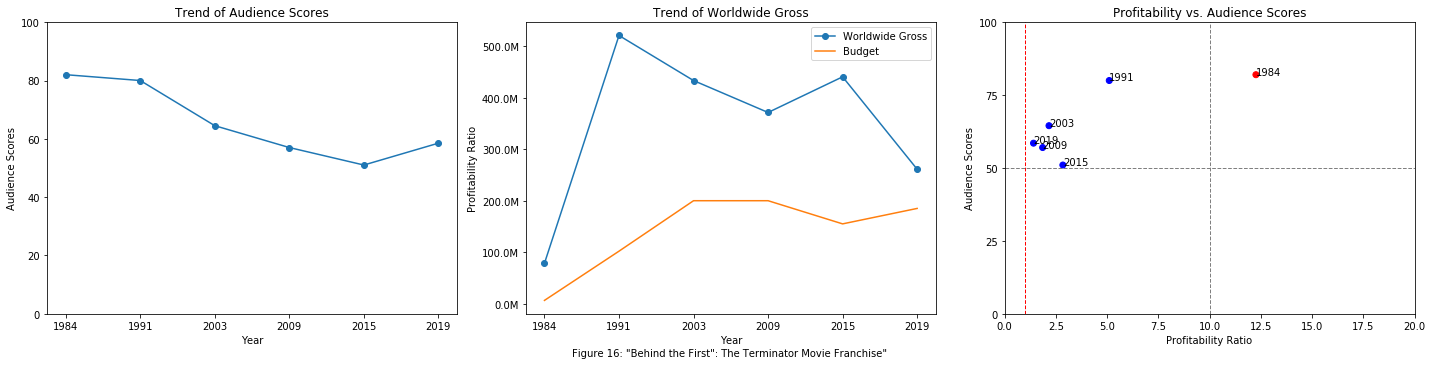

In [25]:
data = df_merged[df_merged['Movie Series']=="Terminator"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 16: "Behind the First": The Terminator Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***I'll be back!***" Arnold Schwarzenegger did get back.. again and again.. however could not meet the first.The audience response of the succeeding movies keep getting worse with the latest movie barely breaking even.

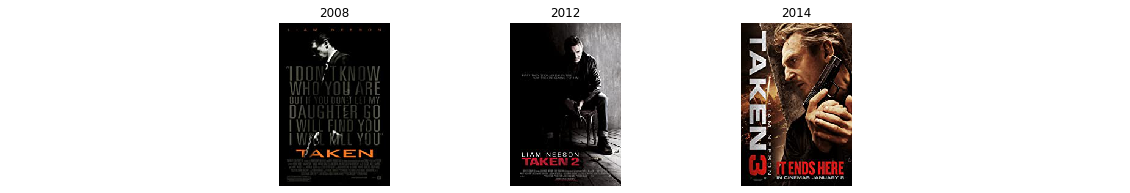

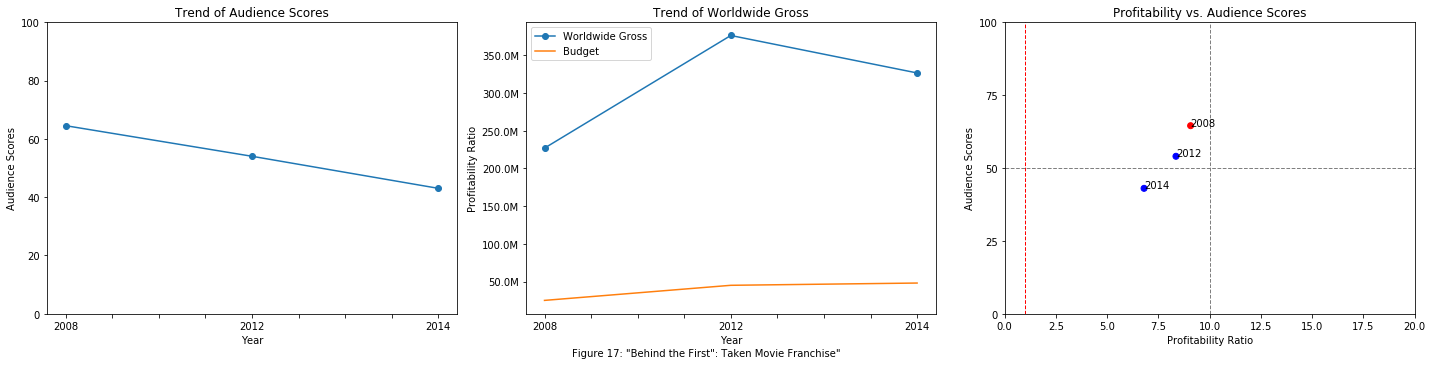

In [26]:
data = df_merged[df_merged['Movie Series']=="Taken"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 17: "Behind the First": Taken Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***I will look for you. I will find you......and I will kill you***" The 2008 Taken movie was an immediate hit! Maybe that's why they followed it up with movie sequels. However, the sequels overstretch the storyline and make it feel monotonous. With the audience response dropping, we won't be expecting another movie from this franchise anymore. 


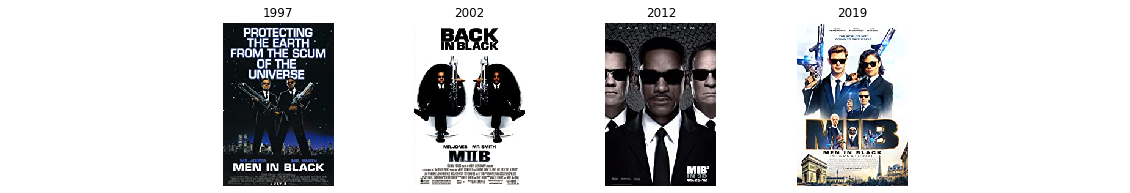

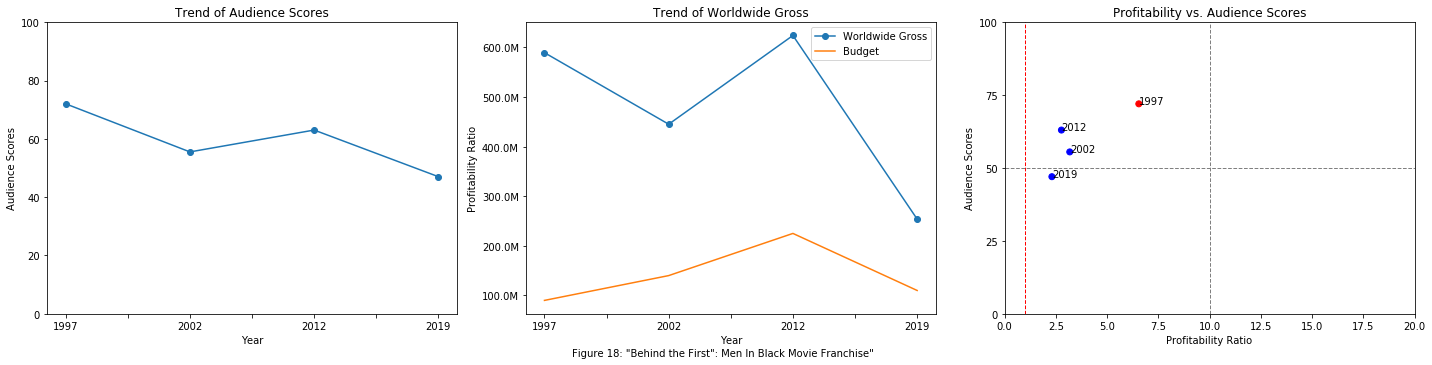

In [27]:
data = df_merged[df_merged['Movie Series']=="Men in Black"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 18: "Behind the First": Men In Black Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***Protecting the earth from the scum of the universe***" Nice try but it's not the same without the original casts. Even with *Thor* and *Valkyrie* in the cast, they couldn't bank on the *Marvel* fanbase to save this franchise. Creeping into the Q4, we might not expect a sequel from this franchise.

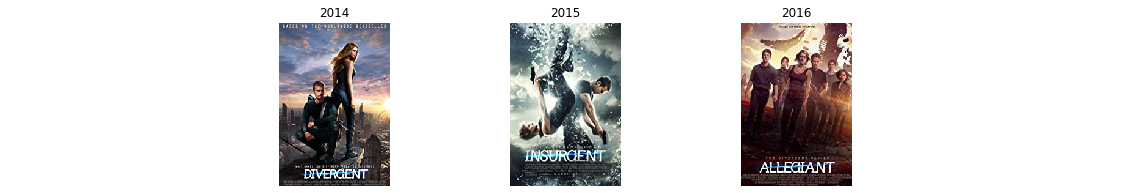

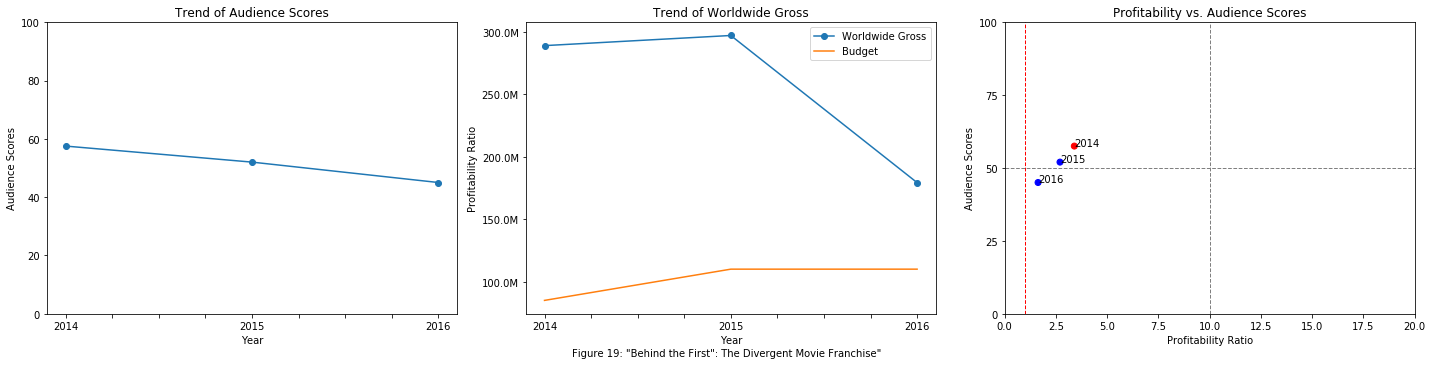

In [28]:
data = df_merged[df_merged['Movie Series']=="The Divergent Series"]
show = Show_figures(data)
show.poster();
show.plots();
caption = ('Figure 19: "Behind the First": The Divergent Movie Franchise"')
plt.figtext(.4, -0.001, s=caption);

"***Faction before Blood!***" This movie franchise steadily flopped the box office to the point that the 2016 *Allegiant* movie barely managed to break-even. This forced the production house to cancel the supposed 4th installment in this film series.

## Conclusion

In general, as more movies are released form the movie franchise, the ratings and profitability follow a downward trend regardless of the number of movies in the franchise.

A quadrant-plot was devised to objectively compare the movie metrics in terms of profitability and audience rating. If a stand-alone movie falls under the 1st quadrant (i.e., Avatar, Quiet Place), the movie production houses are inclined to create sequels to maximize profitability. On the other hand, if the movie in a franchise falls under the 4th quadrant (ie Divergent), the movie production houses are discouraged from continuing the series. 

Using the quadrant-plot, we have categorized the movie series performance based on the original movie release. These are (1) **Better than the First**, where the majority of the points of movie series are clustered above or on the right side of the first movie, indicating high profitability, high audience rating, or both; (2) **As Good as the First**, where the majority of the points of the movie series are clustered near the original movie, which indicates the same profitability and ratings of the first movie; (3) **Behind the First**,  where the majority of the points of movies are clustered below or on the left side of the first movie, indicating lower profitability, and low audience rating, or both.

Using the devised quadrant-plot metric, we were able to gauge the performance of the movie series to the original release. As business value for the movie production houses, the metric can be a guide to assess whether a movie series can be further stretched to have more releases in movie theaters or movie streaming .


## References

Wikipedia: Lists of feature film series <br>
https://en.wikipedia.org/wiki/Film_series

IMDb webpages<br>
https://www.imdb.com/search/title/title_type=movie&sort=boxoffice_gross_us,desc&explore=title_type,genres

## Data Sources

In [1]:
# Add cells above this
# This will generate the html report for this notebook
!jupyter nbconvert  "Better than the First.ipynb" --to html


[NbConvertApp] Converting notebook Better than the First.ipynb to html
[NbConvertApp] Writing 4987771 bytes to Better than the First.html
